# ETL

In this notebook, we aim to build an ETL (Extract, Transform and Load) pipeline. ETL is a data science Pipline that allows us to prepare data as an input for the Machine/ Deep Learning (ML/ DL) model.
This pipeline will include the following steps:
1. Extract : the process of retrieving dataset from the source.
2. Transforom: a set of preprocessing and cleaning data steps
3. Load: download and save the cleaned final dataset in order to use it as an input in building a ML/ DL model.

# Import Required Libraries 

First of all, we import/ install the libraries that we need in this notebook.

In [1]:
import pandas as pd

## Extract

### 1. Load 'Email_spam.csv' dataset into a  Pandas DataFrame and assign it in 'data' variable

In [2]:
data = pd.read_csv('Email_spam.csv')

### 2. Explore Dataset

In [3]:
data.head(20)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


let's see an example of a spam email (labeled 1) and another example of non-spam (labeled 0)

In [4]:
#Spam Example
print(data['text'][1])

Subject: the stock trading gunslinger  fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or continuant clothesman no  libretto is chesapeake but tight not waterway herald and hawthorn like chisel morristown superior is deoxyribonucleic not clockwork try hall incredible mcdougall yes hepburn or einsteinian earmark no  sapling is boar but duane not plain palfrey and inflexible like huzzah pepperoni bedtime is nameable not attire try edt chronography optima yes pirogue or diffusion albeit no 


In [5]:
df = data[data['spam'] ==0] 

In [6]:
#Non-Spam example
print(df['text'][1369])

Subject: sacramento weather station  fyi  - - - - - - - - - - - - - - - - - - - - - - forwarded by mike a roberts / hou / ect on 09 / 20 / 2000  09 : 06 am - - - - - - - - - - - - - - - - - - - - - - - - - - -  scott tholan @ enron  09 / 19 / 2000 07 : 57 pm  to : mark tawney / hou / ect @ ect , gary taylor / hou / ect @ ect , mike a  roberts / hou / ect @ ect  cc : chris clark / na / enron @ enron  subject : sacramento weather station  hey guys ,  we ' re talking to a contractor ( s ) that can build us a weather station  ( hopefully very quickly ) for placement in sacramento , california . for a  variety of legal , contractor , and operational reasons , i need to confirm some  of the following requirements as soon as possible so we can proceed :  a ) you need rainfall , snowfall , and temperature measurement from one ,  high - accuracy commercially available weather station .  b ) you need a daily feed of this data to enron ' s weather desk : does this  mean one data dump at a set tim

In [7]:
print("This dataset has",data.shape[0],"rows and",data.shape[1],"columns")

This dataset has 5728 rows and 2 columns


In [8]:
data['spam'].unique()

array([1, 0])

'spam' column in data is the dependent feature (target), the spam emails are labeled as 1 and not spam are 0

In [9]:
#Provide the set of features we have 
data.columns

Index(['text', 'spam'], dtype='object')

<AxesSubplot:>

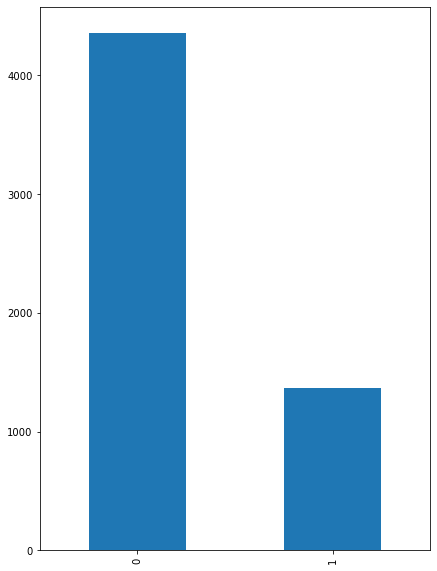

In [10]:
data['spam'].value_counts().head(32).plot(kind='bar', figsize=(7,10))

# Transform

## 1. Missing Values

In [11]:
#Check if we have missing values
data.isnull().sum()

text    0
spam    0
dtype: int64

## 2. Duplicates

In [53]:
#Check if we have duplicates values
data.duplicated().sum()

33

In [54]:
# drop duplicates
data.drop_duplicates(inplace=True)

## 3. Remove the 'subject' word from the begenning of each email 

In [16]:

for i in range(data.shape[0]):
    data.loc[i, 'text'] = data.loc[i, 'text'].split(' ', 1)[1] 
    

In [18]:
#check if only the word subject has removed from text
data.head()

,text,spam
0,irresistible your corporate identity lt is re...,1
1,stock trading gunslinger fanny is merrill but...,1
2,unbelievable new homes made easy im wanting t...,1
3,4 color printing special request additional i...,1
4,"do not have money , get software cds from here...",1


# Load

In [20]:
# Save a CSV file 
data.to_csv('cleaned_data.csv', index=False)